In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)


import pandas
data = pandas.read_csv('../data/standardised_rrpu2.csv')
data

,Unnamed: 0,strain,plasmid,backbone,iptg,log_mean_gfp,log_mean_v_x,log_std_gfp,log_std_v,log_rho,fit_goodness,std_gfp_correct,rrpu,median_yfp,newstandard
0,0,KT2440,1201,pSeva221,1,0.250036,2.314908,0.474749,0.963332,0.299708,0.975201,0.452925,0.269272,NaN,0.014204
1,1,KT2440,1201,pSeva221,5,0.037474,1.950081,0.456776,0.945077,0.328764,0.989436,0.431385,0.116138,NaN,-0.007895
2,2,KT2440,1201,pSeva221,10,0.093799,2.196333,0.463687,0.949740,0.289366,0.982129,0.443850,0.128950,NaN,-0.006173
3,3,KT2440,1201,pSeva221,20,0.173098,2.280760,0.494051,0.984647,0.353470,0.981735,0.462158,0.202252,NaN,0.004115
4,4,KT2440,1201,pSeva221,30,0.044898,2.189524,0.461442,0.961913,0.282821,0.979128,0.442603,0.079579,NaN,-0.012689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,1881,KT2440,Srpr_s4,pSeva251,100,1.831379,1.784507,0.722501,0.812192,0.489919,0.986858,0.629853,1.885751,0.21,0.217455
1882,1882,KT2440,Srpr_s4,pSeva251,200,1.722367,1.804346,0.782778,0.840321,0.469963,0.984655,0.690947,1.768299,0.18,0.189458
1883,1883,KT2440,Srpr_s4,pSeva251,500,1.579250,1.898264,0.822829,0.852300,0.480380,0.981007,0.721671,1.584353,0.15,0.151712
1884,1884,KT2440,Srpr_s4,pSeva251,1000,1.315686,1.882350,0.780218,0.817074,0.535988,0.986397,0.658680,1.329462,0.11,0.109659


7 contextes
In context ('CC118Lpir', 'pSeva221')


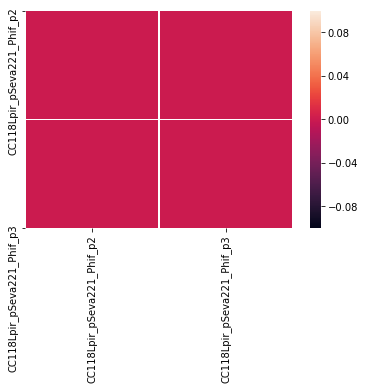

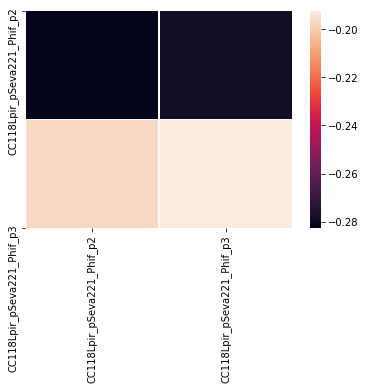

7 contextes
In context ('CC118Lpir', 'pSeva231')


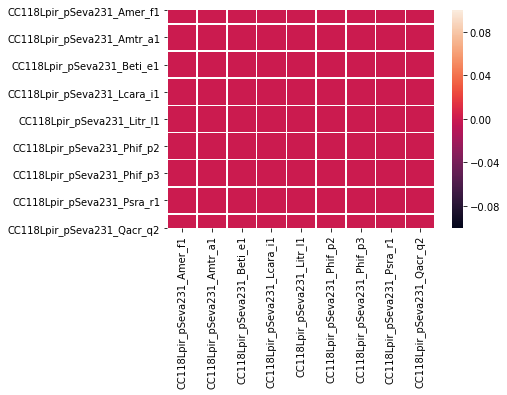

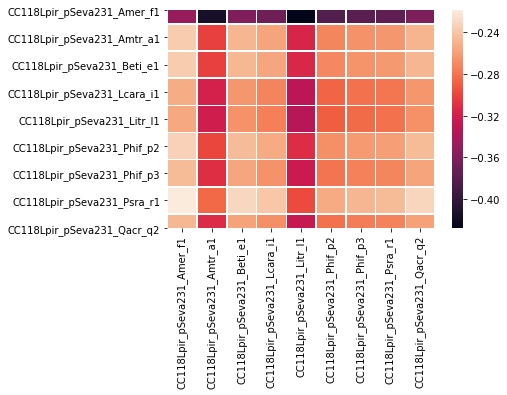

7 contextes
In context ('DH5alpha', 'pAN')


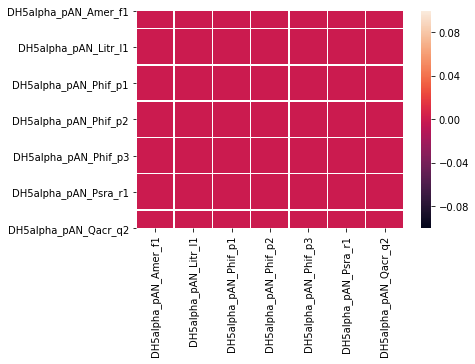

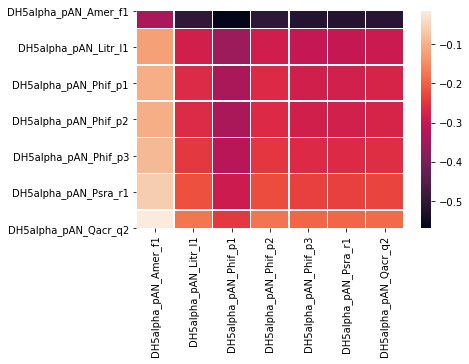

7 contextes
In context ('DH5alpha', 'pSeva221')


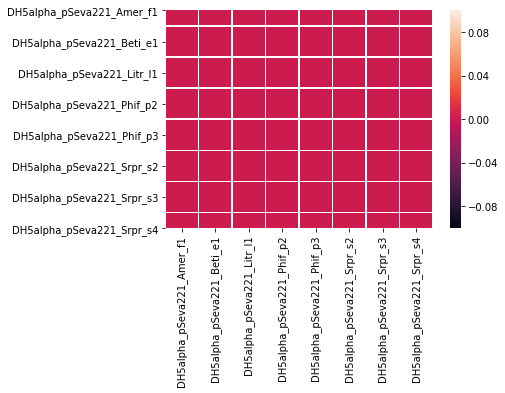

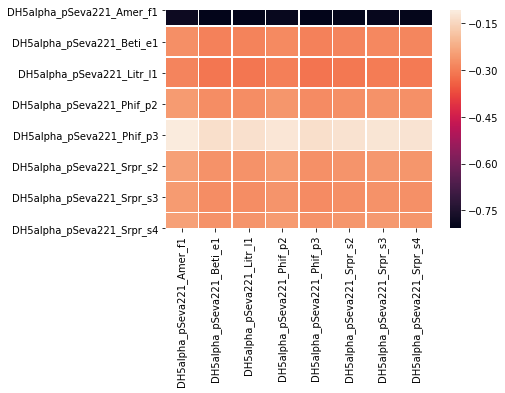

7 contextes
In context ('KT2440', 'pSeva221')


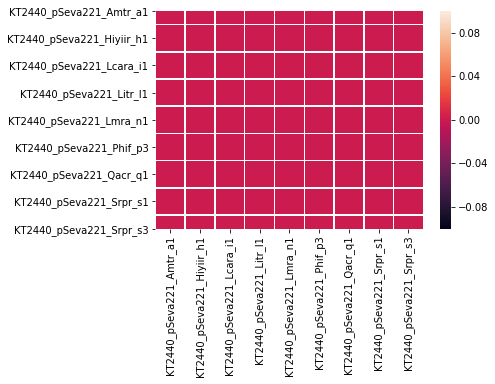

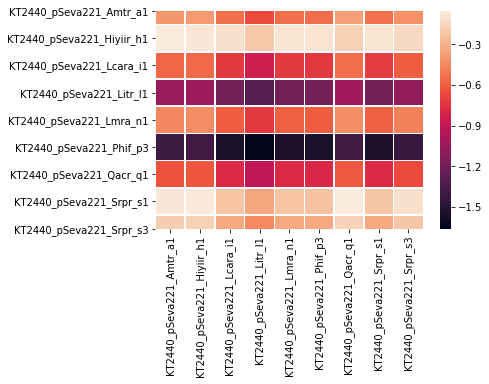

7 contextes
In context ('KT2440', 'pSeva231')


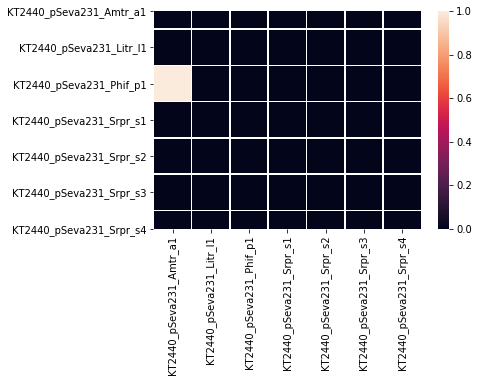

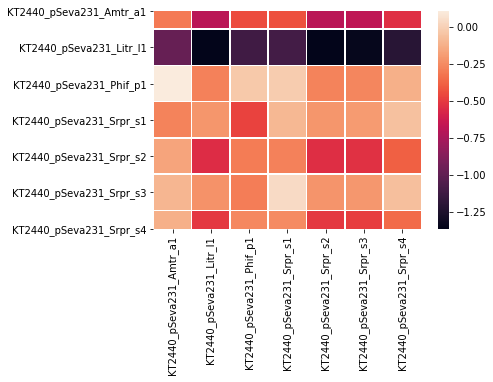

7 contextes
In context ('KT2440', 'pSeva251')


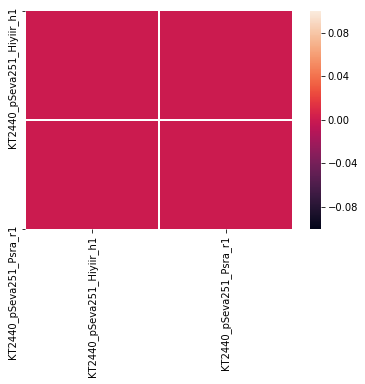

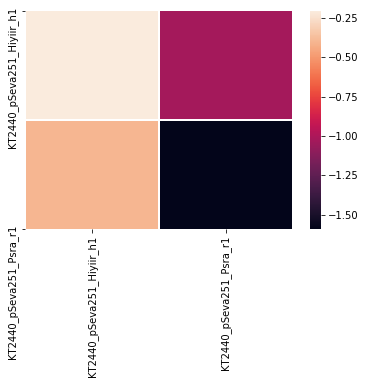

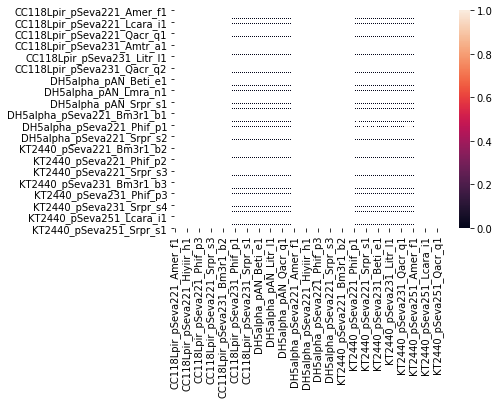

In [12]:
from pyolin.analysis import GateData
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import score_heatmap
from pyolin.analysis import compatibility_heatmap
from pyolin.analysis import filter_valid

from pyolin.gate import Gate

import matplotlib.pyplot as plt

gdata = GateData(data)
for context in gdata.contexts:
    print(f"{len(gdata.contexts)} contextes")
    print(f"In context {context}")
    gates = gdata[context[0]:context[1]:]

    if isinstance(gates, Gate):
        gates = [gates]

    gates = filter_valid(gates)
    
    compatibility_heatmap(gates)
    plt.show()
    score_heatmap(gates)
    plt.show()



101

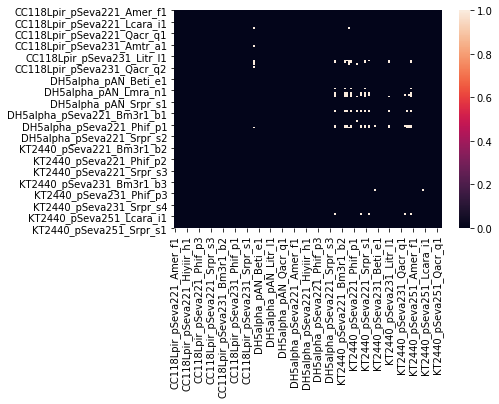

In [24]:
from pyolin.analysis import compatibility_table

import pandas
import seaborn

seaborn.heatmap(compatibility_table(gdata[::]))

count = 0
for id, row in compatibility_table(gdata[::]).iterrows():
    count += sum(map(lambda x: 1 if x else 0, row.tolist()))
    
count

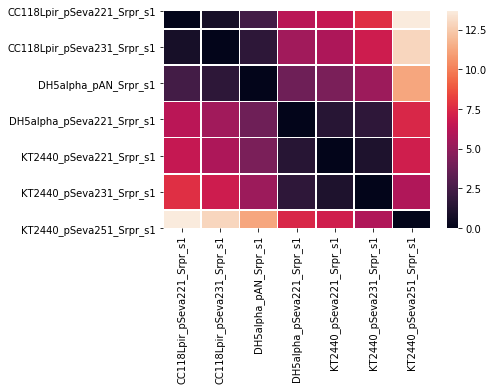

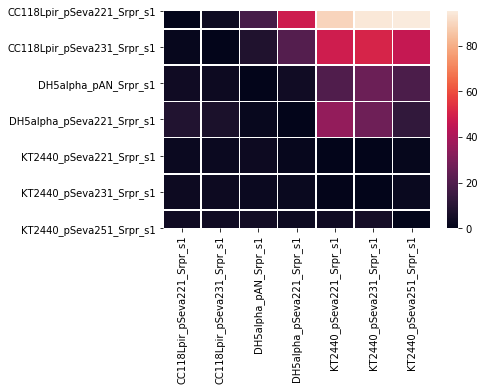

In [3]:
from pyolin.analysis import similarity_table
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import curve_length
from pyolin.analysis import frechet
from pyolin.analysis import area
from pyolin.analysis import pcm

import seaborn as sns
import matplotlib.pylab as plt

similarity_heatmap(gdata, 'Srpr_s1', func=frechet)
plt.show()
similarity_heatmap(gdata, 'Srpr_s1', func=pcm)
plt.show();

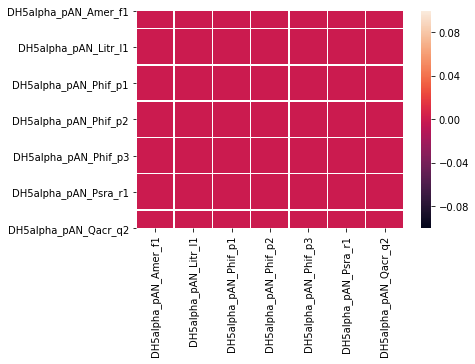

In [4]:
from pyolin.analysis import compatibility_table
from pyolin.analysis import filter_valid

results = compatibility_table(filter_valid(gdata['DH5alpha':'pAN':]))
sns.heatmap(results, linewidth=0.5);

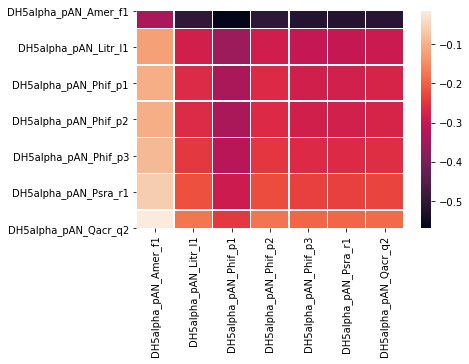

In [5]:
from pyolin.analysis import score_table
from pyolin.analysis import filter_valid


sns.heatmap(score_table(filter_valid(gdata['DH5alpha':'pAN':])), linewidth=0.5);

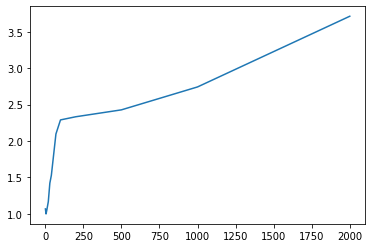

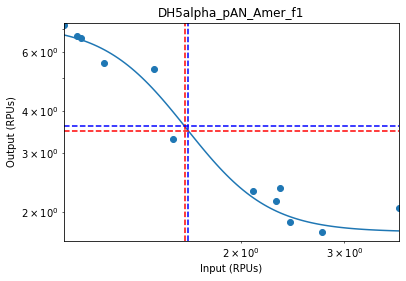

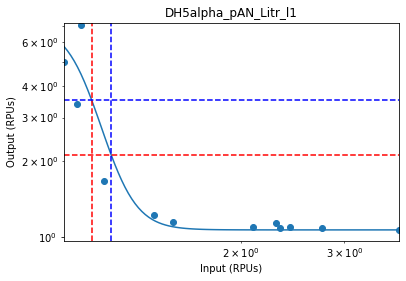

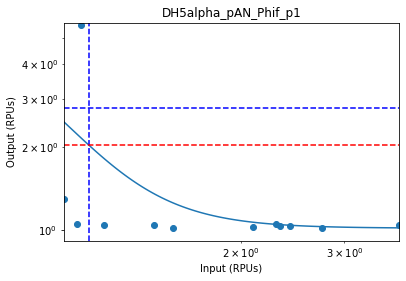

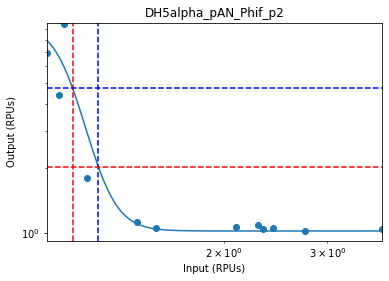

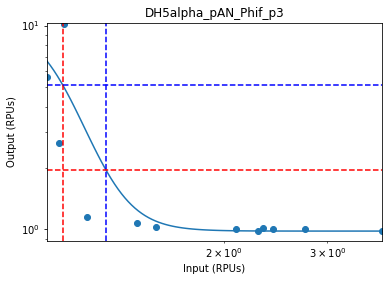

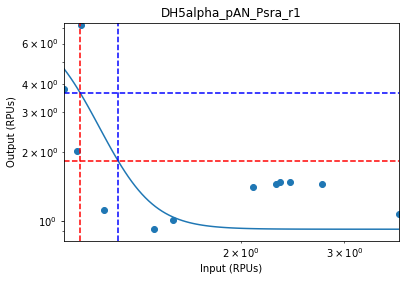

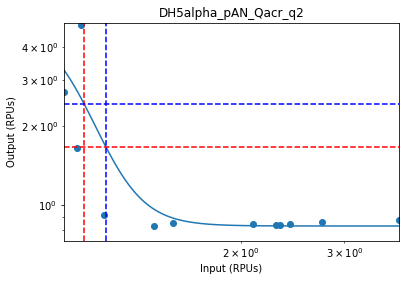

In [6]:
from pyolin.analysis import filter_valid

plt.plot([x for (x, y) in gdata.get_gate_curve('DH5alpha', 'pAN', '1818')],
         [y for (x, y) in gdata.get_gate_curve('DH5alpha', 'pAN', '1818')])

for gate in filter_valid(gdata['DH5alpha':'pAN':]):
    gate.rpuplot()